# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Load the Data

In [2]:
train_df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
train_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking the Missing values

In [3]:
train_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
train_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization
let's try some data visualization techniques here, first lets analyze the correlation among the values

In [5]:
corr = train_df.corr()
corr.values

array([[ 1.        ,  0.12945867,  0.14128198, -0.08167177, -0.07353461,
         0.01768309, -0.03352267,  0.54434123,  0.22189815],
       [ 0.12945867,  1.        ,  0.15258959,  0.05732789,  0.33135711,
         0.22107107,  0.1373373 ,  0.26351432,  0.4665814 ],
       [ 0.14128198,  0.15258959,  1.        ,  0.20737054,  0.08893338,
         0.28180529,  0.04126495,  0.23952795,  0.06506836],
       [-0.08167177,  0.05732789,  0.20737054,  1.        ,  0.43678257,
         0.3925732 ,  0.18392757, -0.11397026,  0.07475223],
       [-0.07353461,  0.33135711,  0.08893338,  0.43678257,  1.        ,
         0.19785906,  0.18507093, -0.04216295,  0.13054795],
       [ 0.01768309,  0.22107107,  0.28180529,  0.3925732 ,  0.19785906,
         1.        ,  0.14064695,  0.03624187,  0.29269466],
       [-0.03352267,  0.1373373 ,  0.04126495,  0.18392757,  0.18507093,
         0.14064695,  1.        ,  0.03356131,  0.17384407],
       [ 0.54434123,  0.26351432,  0.23952795, -0.11397026, -0

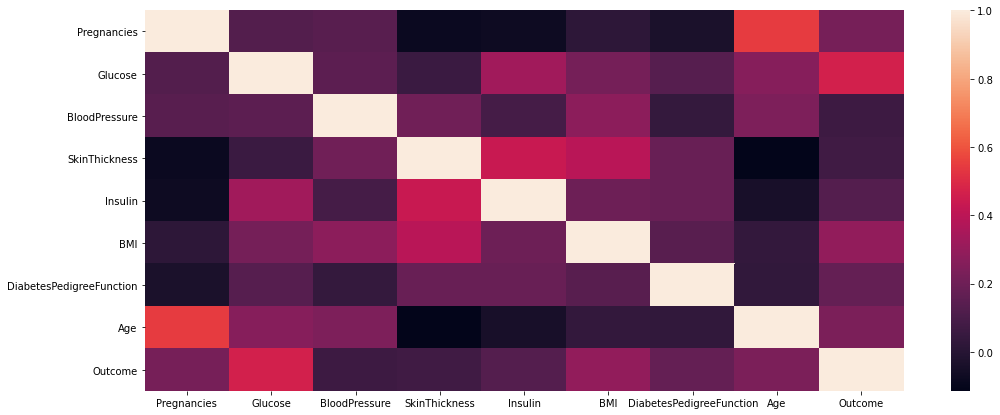

In [6]:
plt.figure(figsize=(17,7))
sns.heatmap(corr)

correlation between Blood pressure, Glucose and outcome

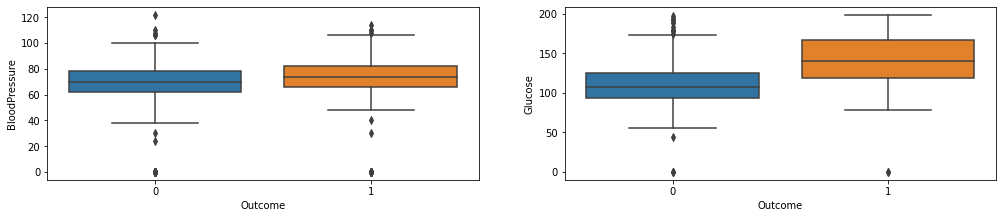

In [7]:
plt.figure(figsize=(17,7))
plt.subplot(2,2,1)
sns.boxplot(train_df['Outcome'],train_df['BloodPressure'])
plt.subplot(2,2,2)
sns.boxplot(train_df['Outcome'],train_df['Glucose'])

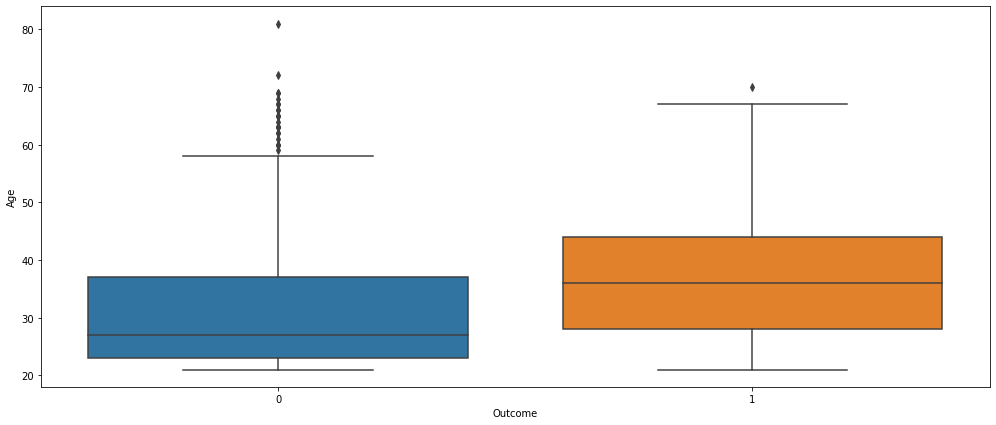

In [8]:
plt.figure(figsize=(17,7))
sns.boxplot(train_df['Outcome'],train_df['Age'])

# Model development

In [9]:
X = train_df.drop(['Outcome'], axis =1)
y = train_df['Outcome']

In [10]:
X[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y[0:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
print('training data : ',X_train.shape, y_train.shape)
print('testing data : ',X_test.shape, y_test.shape)

training data :  (614, 8) (614,)
testing data :  (154, 8) (154,)


# Loading the Decision Tree model

In [13]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction part

In [14]:
y_pred = dtc.predict(X_test)

Lets calcluate the accuracy score!!

In [15]:
acc = accuracy_score(y_pred, y_test)
print('Accuracy is : ',acc)

Accuracy is :  0.7402597402597403


**So now the first part of code is done with 76% accuracy we are able to predict the correct values 76% times so now we can explore more models or apply more feature extraction methods**

The simple DecisioTreeClassifier is demonstrated do upvote it if you liked it and you can edit it for modifications that you think is necessary and do comment if any changes can be made.
Cheers!!